# MNIST Benchmark  

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import tensorflow as tf

tf.enable_eager_execution()

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 14

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

## Without Dropout

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/14
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.1583 - acc: 0.9535 - val_loss: 0.0466 - val_acc: 0.9846
Epoch 2/14
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0432 - acc: 0.9868 - val_loss: 0.0399 - val_acc: 0.9864
Epoch 3/14
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0295 - acc: 0.9903 - val_loss: 0.0363 - val_acc: 0.9883
Epoch 4/14
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0183 - acc: 0.9940 - val_loss: 0.0296 - val_acc: 0.9905
Epoch 5/14
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0126 - acc: 0.9960 - val_loss: 0.0419 - val_acc: 0.9881
Epoch 6/14
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0099 - acc: 0.9968 - val_loss: 0.0352 - val_acc: 0.9906
Epoch 7/14
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.0083 - acc: 0.9969 - val_loss: 0.

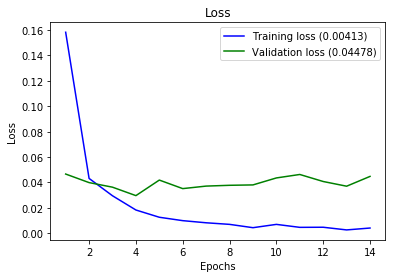

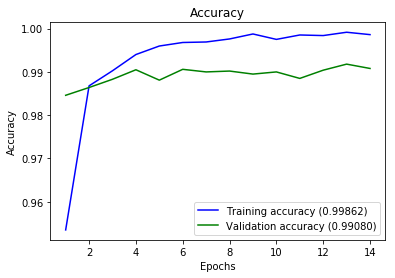

In [5]:
plot_history(history)

## With Dropout

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/14
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.1910 - acc: 0.9422 - val_loss: 0.0500 - val_acc: 0.9843
Epoch 2/14
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0585 - acc: 0.9820 - val_loss: 0.0350 - val_acc: 0.9886
Epoch 3/14
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0423 - acc: 0.9866 - val_loss: 0.0346 - val_acc: 0.9881
Epoch 4/14
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0311 - acc: 0.9902 - val_loss: 0.0315 - val_acc: 0.9894
Epoch 5/14
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0268 - acc: 0.9913 - val_loss: 0.0294 - val_acc: 0.9897
Epoch 6/14
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.0216 - acc: 0.9931 - val_loss: 0.0290 - val_acc: 0.9917
Epoch 7/14
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.0182 - acc: 0.9941 - val_loss: 0.

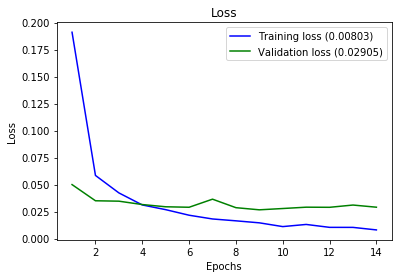

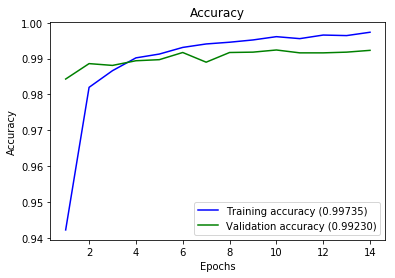

In [7]:
plot_history(history)

## With Dropin

In [8]:
from dropin import Dropin

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropin(0.75))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropin(0.75))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/14
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.1817 - acc: 0.9454 - val_loss: 0.0456 - val_acc: 0.9849
Epoch 2/14
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0560 - acc: 0.9826 - val_loss: 0.0333 - val_acc: 0.9877
Epoch 3/14
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0381 - acc: 0.9879 - val_loss: 0.0308 - val_acc: 0.9895
Epoch 4/14
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0289 - acc: 0.9907 - val_loss: 0.0270 - val_acc: 0.9914
Epoch 5/14
60000/60000 [==============================] - 81s 1ms/sample - loss: 0.0231 - acc: 0.9926 - val_loss: 0.0295 - val_acc: 0.9918
Epoch 6/14
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0203 - acc: 0.9934 - val_loss: 0.0262 - val_acc: 0.9914
Epoch 7/14
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0173 - acc: 0.9938 - val_loss: 0.

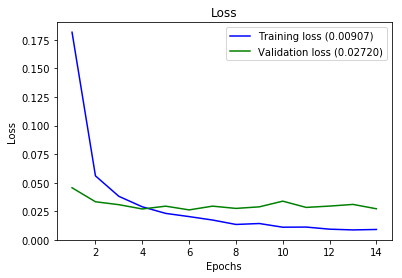

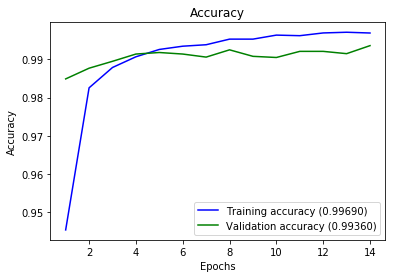

In [10]:
plot_history(history)